# `Setup`

In [2]:
# Library Import
import yaml
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image, ImageDraw, ImageFont, ImageSequence
import random
import time
import cv2
from IPython.display import display, clear_output, Image as ipyImage

### `Config`

In [3]:
# Changing the working directory to the project directory
if not os.getcwd().split('/')[-1] == 'aml_itu':
    os.chdir('../')

print(os.getcwd())

/Users/rasmuskrebs/Documents/School/semester_3/advanced_ml/aml_itu


In [4]:
# Loading the config file
with open("config.yml", 'r') as stream:
    config = yaml.safe_load(stream)
    
    
# Training Images
train_img = config['dataset']['images']['train']

# Outputting config    
config

{'dataset': {'name': 'state-farm-distracted-driver-detection',
  'data': '../state-farm-distracted-driver-detection/driver_imgs_list.csv',
  'images': {'train': '../state-farm-distracted-driver-detection/imgs/train',
   'test': '../state-farm-distracted-driver-detection/imgs/test'},
  'class_mapping': {'c0': 'safe driving',
   'c1': 'texting - right',
   'c2': 'talking on the phone - right',
   'c3': 'texting - left',
   'c4': 'talking on the phone - left',
   'c5': 'operating the radio',
   'c6': 'drinking',
   'c7': 'reaching behind',
   'c8': 'hair and makeup',
   'c9': 'talking to passenger'}},
 'outputs': {'path': './outputs'}}

In [5]:
# Loading the data
df = pd.read_csv(config['dataset']['data'])

In [6]:
config['dataset']['class_mapping']

{'c0': 'safe driving',
 'c1': 'texting - right',
 'c2': 'talking on the phone - right',
 'c3': 'texting - left',
 'c4': 'talking on the phone - left',
 'c5': 'operating the radio',
 'c6': 'drinking',
 'c7': 'reaching behind',
 'c8': 'hair and makeup',
 'c9': 'talking to passenger'}

In [7]:
# Map the class names to the class ids
df['target'] = df['classname'].map(config['dataset']['class_mapping'])

## `Main`

In [8]:
# Function for loading images
def load_images(folder, class_name):
    # List of images
    images = []
    
    # Path
    folder = os.path.join(folder, class_name)
    
    # Looping through the images
    for img in os.listdir(folder):
        
        # Reading the image
        img = cv2.imread(os.path.join(folder, img))
        
        # Appending the image to the list
        images.append(img)
    
    images = np.array(images)
    
    assert len(df[df['classname'] == class_name]) == images.shape[0], "Image list does not match the rows in the dataframe"
    
    return images

In [9]:
# Loading class 0 images
c0_images = load_images(train_img, 'c0')

In [83]:
# Outputting shape of the images
print(f'Images in class: {c0_images.shape[0]:>8}')
print(f'Image pixel heigh: {c0_images.shape[1]:>5}')
print(f'Image pixel width: {c0_images.shape[2]:>5}')
print(f'Image channels: {c0_images.shape[3]:>6}')

print('\nClass 0 images shape:', c0_images.shape)

Images in class:     2489
Image pixel heigh:   480
Image pixel width:   640
Image channels:      3

Class 0 images shape: (2489, 480, 640, 3)


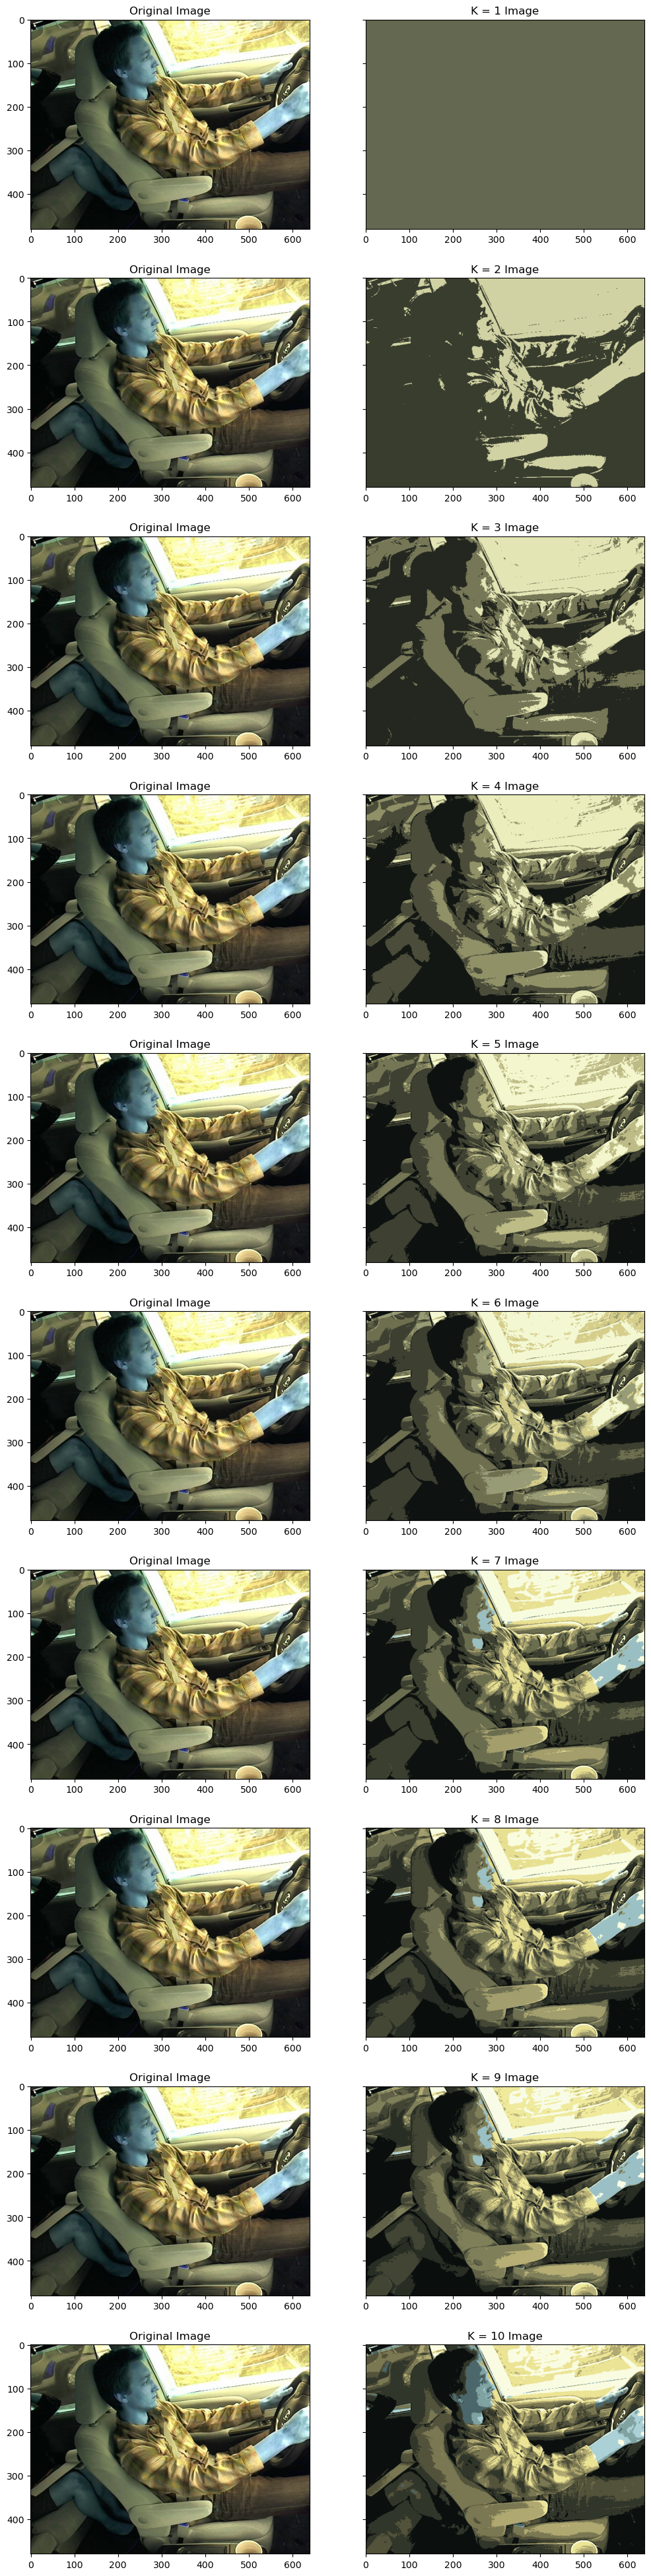

In [11]:
# This code is copied from here: https://www.geeksforgeeks.org/image-segmentation-by-clustering/

# Kmeans Clustering of pixels
plt.rcParams["figure.figsize"] = (12,50) 
  
# load image 
img = c0_images[random.randint(0, len(c0_images))]
Z = img.reshape((-1,3)) 
# convert to np.float32 
Z = np.float32(Z) 
  
# define stopping criteria, number of clusters(K) and apply kmeans() 
# TERM_CRITERIA_EPS : stop when the epsilon value is reached 
# TERM_CRITERIA_MAX_ITER:  stop when Max iteration is reached 
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0) 
  
fig, ax = plt.subplots(10,2, sharey=True) 
for i in range(10): 
  K = i+1
  # apply K-means algorithm 
  ret,label,center=cv2.kmeans(Z,K,None,criteria,attempts = 10, 
                             flags=cv2.KMEANS_RANDOM_CENTERS) 
  # Now convert back into uint8, and make original image 
  center = np.uint8(center) 
  res = center[label.flatten()] 
  res2 = res.reshape((img.shape)) 
  # plot the original image and K-means image 
  ax[i, 1].imshow(res2) 
  ax[i,1].set_title('K = %s Image'%K) 
  ax[i, 0].imshow(img, ) 
  ax[i,0].set_title('Original Image') 

In [88]:
# Random function for scan-loading images
def image_loading(image, delay=0.1):
    for i in range(image.shape[0]):
        img = Image.fromarray(image[0:i+1])
        # Display image
        display(img)
        # Pause for delay
        time.sleep(delay)
        # Clear output to make sure only one image is displayed, but wait for new image to be displayed
        clear_output(wait=True)

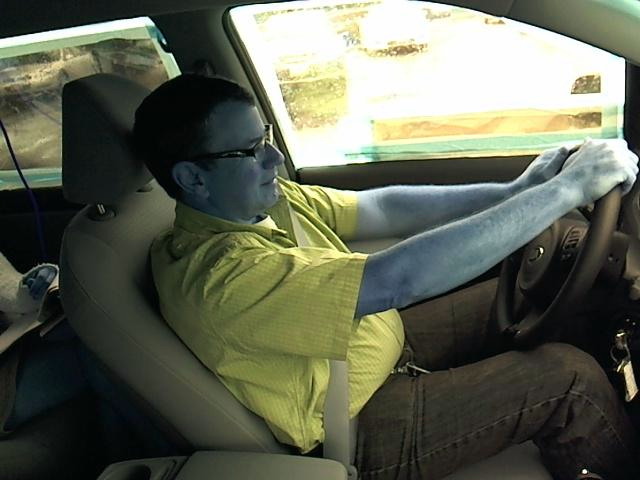

In [89]:
# Visualizing image loading
image_loading(c0_images[random.randint(0,len(c0_images))], .001)

#### Blending images ontop of each other

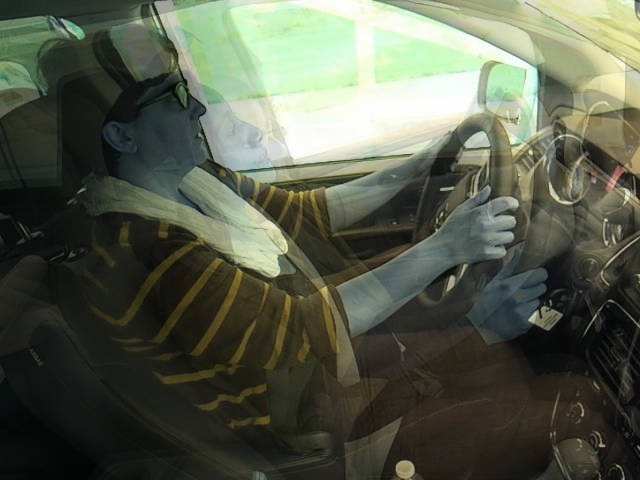

In [90]:
# Blending images into one
img = c0_images[0]
for image in c0_images[1:]:
    img = (img+image)/2

Image.fromarray(img.astype(np.uint8))
